# Fitting Distributions to a Dataset 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scipy
import scipy.stats as stats
import pandas as pd
import numpy as np
from ipywidgets import interact, interact_manual

### Import Data

In [2]:
continuous_distributions = "continuous.csv"
dists_unindexed = pd.read_csv(continuous_distributions)
dist_list = dists_unindexed.distribution.tolist()
dists = dists_unindexed.set_index(dists_unindexed.distribution)

In [3]:
file_names = ['453488','456615','459659','463721','465734','436464','437789','439070','441615']
file_path = ""   #Path to your data here

In [4]:
def save_figure(path,name):
    plt.savefig(path+name+".png",
                dpi=200,
                facecolor='none',
                edgecolor='none'
               )

In [5]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

In [6]:
def dist_fit(path,name,dist_name,binsize):
    #If your data is in an excel spreadsheet save it as a delimited text file (.csv formatted)
    filename = path+name+".txt"
    df = pd.read_csv(filename,names=["Hs","File"])           
    title = "Node #: "+str(name)+"\n"
    
    #Initialize figure and set dimensions
    fig = plt.figure(figsize = (18,6))
    gs = gridspec.GridSpec(2,2)
    ax1 = fig.add_subplot(gs[:,0])
    ax3 = fig.add_subplot(gs[:,1])
    ax1.set_title(title,fontsize=20)
    
    #Remove the plot frame lines. They are unnecessary chartjunk.
    ax1.spines["top"].set_visible(False)  
    ax1.spines["right"].set_visible(False) 
    ax3.spines["top"].set_visible(False)  
    ax3.spines["right"].set_visible(False) 
    
    # Ensure that the axis ticks only show up on the bottom and left of the plot.  
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.  
    ax1.get_xaxis().tick_bottom()  
    ax1.get_yaxis().tick_left()  
    ax3.get_xaxis().tick_bottom()  
    ax3.get_yaxis().tick_left()  
    
    # Make sure your axis ticks are large enough to be easily read.  
    # You don't want your viewers squinting to read your plot.  
    ax1.tick_params(axis="both", which="both", bottom="off", top="off",  
                    labelbottom="on", left="on", right="off", labelleft="on",labelsize=14)
    ax3.tick_params(axis="both", which="both", bottom="off", top="off",  
                    labelbottom="on", left="on", right="off", labelleft="on",labelsize=14)

    # Along the same vein, make sure your axis labels are large  
    # enough to be easily read as well. Make them slightly larger  
    # than your axis tick labels so they stand out.  
    ax1.set_xlabel("Wave Height (m)", fontsize=16)  
    ax1.set_ylabel("Frequency of occurence", fontsize=16)  
    ax3.set_xlabel("Wave Height (m)", fontsize=16) 
    ax3.set_ylabel("Probability Hs < x", fontsize=16)
    #set x-axis limits
    ax1.set_xlim(0,3)
    ax3.set_xlim(0,3)
    #Setting .... variables
    size    = len(df.Hs)
    max_val = 2*max(df.Hs)
    x0 = np.arange(0,max_val,max_val*0.0001)
    x1 = np.arange(0,3,binsize)
    y1 = df.Hs
    #Plot histograms
    EPDF = ax1.hist(y1, bins=x1, color='w')
    ECDF = ax3.hist(y1, bins=x1, color='w', normed=1, cumulative=True)
    #Fitting distribution
    dist  = getattr(scipy.stats, dist_name)
    param = dist.fit(y1)
    pdf_fitted = dist.pdf(x0, *param[:-2], loc=param[-2], scale=param[-1])*size*binsize
    cdf_fitted = dist.cdf(x0, *param[:-2], loc=param[-2], scale=param[-1])
    
    #Checking goodness of fit
    #ks_fit = stats.kstest(pdf_fitted,dist_name) # Kolmogorov-Smirnov test: returns [KS stat (D,D+,orD-),pvalue]
    #print(ks_fit)
    
    #Finding location of 0.002 and 0.01 exceedence probability events 
    FiveHundInd = find_nearest(cdf_fitted,0.998)
    OneHundInd  = find_nearest(cdf_fitted,0.990)
    #Plotting pdf and cdf    
    ax1.plot(x0,pdf_fitted,linewidth=2,label=dist_name)
    ax3.plot(x0,cdf_fitted,linewidth=2,label=dist_name)
    #update figure spacing
    gs.update(wspace=0.1, hspace=0.2)
    #adding a text box
    ax3.text(-1.7,0.7,
             dist_name.upper()+" distribution\n"
             +"\n"
             +"0.2% - value: " + str("%.2f" %x0[FiveHundInd])+ " meters\n"
             +"1.0% - value: " + str("%.2f" %x0[OneHundInd]) + " meters",
             fontsize=14
            )

    print(dists.loc[dist_name,'description']+"\n")
    print('Distribution parameters: '+str(param)+"\n\n")
    
    plt.show()
    return name

In [7]:
import matplotlib as mpl
#mpl.style.available

In [8]:
mpl.style.use('seaborn-notebook')

A generalized extreme value continuous random variable.

Distribution parameters: (0.096722889323678979, 0.38716118882974093, 0.22310119769768522)




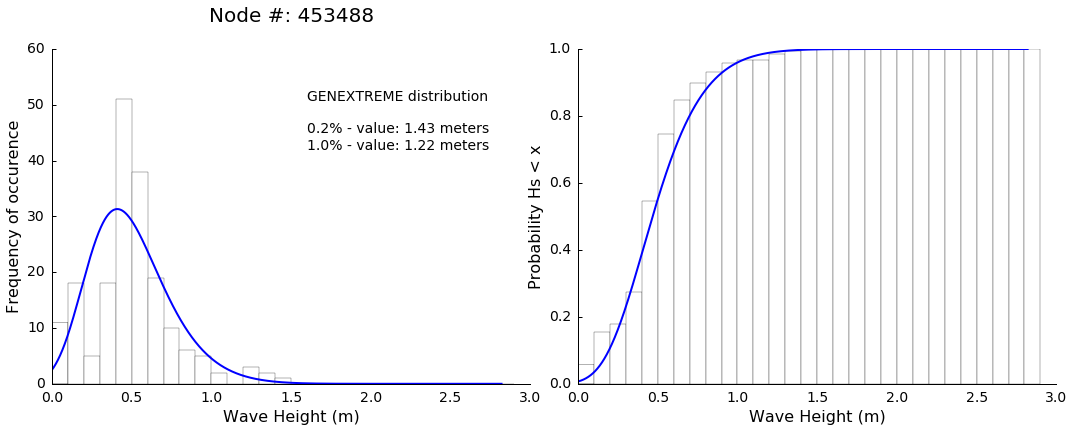

'453488'

In [9]:
interact(dist_fit, path=file_path, name=file_names, dist_name=dist_list,binsize=[0.05,0.55,0.05])

   ###References:
   Python <br\>
   http://stackoverflow.com/questions/6615489/fitting-distributions-goodness-of-fit-p-value-is-it-possible-to-do-this-with/16651524#16651524 <br\>
   http://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python <br\><br\>
   Extreme wave statistics <br\>
   http://drs.nio.org/drs/bitstream/handle/2264/4165/Nat_Hazards_64_223a.pdf;jsessionid=55AAEDE5A2BF3AA06C6CCB5CE3CBEBAD?sequence=1 <br\><br\>
   List of available distributions can be found here <br\>
   http://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions<br\><br\>
   Goodness of fit tests <br\>
   http://statsmodels.sourceforge.net/stable/stats.html#goodness-of-fit-tests-and-measures <br\>
   http://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions <br\>